In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# OLS
from statsmodels.formula.api import ols
import statsmodels.api as sm
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import mean_absolute_error
import warnings

In [47]:
import warnings
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")
warnings.simplefilter(action='ignore')

In [6]:
!pip install lightgbm

In [45]:
# 라이브러리 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier, plot_importance

from matplotlib import pyplot as plt
from lightgbm import plot_importance
from lightgbm import plot_tree

from sklearn.metrics import classification_report

In [14]:
import lightgbm as lgb


In [33]:
total = pd.read_csv("total_data(2016포함).csv")

In [34]:
total = total[(total["year"] != "2020(상반기)") & (total["year"] != "2020(하반기)")]

In [35]:
col_name_x = total.columns[2:-5]
col_name_y = total.columns[-5:]

In [59]:
total[["year", "q1", "q2", "q3", "q4", "q5"]]

,year,q1,q2,q3,q4,q5
0,2017(상반기),75.2,76.5,69.9,65.9,72.6
1,2017(상반기),81.6,82.4,69.1,62.7,72.2
2,2017(상반기),77.3,79.3,68.8,61.0,71.7
3,2017(상반기),78.0,80.0,67.0,66.3,71.4
4,2017(상반기),78.6,80.6,70.7,65.2,75.4
...,...,...,...,...,...,...
241,2019(하반기),79.1,79.5,68.5,71.2,76.0
242,2019(하반기),80.8,80.0,70.8,73.2,76.5
243,2019(하반기),75.0,76.5,69.4,68.9,73.1
244,2019(하반기),78.7,79.6,70.3,74.6,75.6


In [36]:
X = total[col_name_x]
y = total[col_name_y]
x_train = X.loc[:163]
x_test = X.loc[164:]
y_train = y.loc[:163]
y_test = y.loc[164:]

In [ ]:
[["year", "q1", "q2", "q3", "q4", "q5"]]
y_train[["year", "q1"]]

In [37]:
y1_train = y_train[["q1"]]
y1_test = y_test[["q1"]]

y2_train = y_train["q2"]
y2_test = y_test["q2"]

y3_train = y_train["q3"]
y3_test = y_test["q3"]

y4_train = y_train["q4"]
y4_test = y_test["q4"]

y5_train = y_train["q5"]
y5_test = y_test["q5"]

In [10]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_s = pd.DataFrame(std_scaler.transform(x_train), columns = x_train.columns)
# x_train_s = sm.add_constant(x_train, has_constant = "add")

x_test_s = std_scaler.transform(x_test)
x_test_s = pd.DataFrame(std_scaler.transform(x_test), columns = x_test.columns)
# x_test_s = sm.add_constant(x_test, has_constant = "add")

In [17]:
b1 = ['report_sx_여성', 'vio_cnt', 'theft_violence_x', 'robber_murder_x',
       'theft_violence_y', 'robber_murder_y', '가해_10대이하', '피해_80대이상', 'for_합계',
       'popu_2030', 'popu_o60', 'for_u20', 'for_2030', 'for_4050', 'for_o60',
       'single_합계', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_4050', 'single_f_o60']

b2 = ['robber_murder_y', 'single_o60', '가해_10대이하', 'for_u20',
       'robber_murder_x', 'for_합계', '피해_80대이상', 'vio_cnt', 'single_합계',
       'single_f_합계', 'theft_violence_y', 'theft_violence_x', 'for_o60',
       'single_4050', 'single_f_4050', 'popu_o60', 'single_f_o60',
       'report_sx_여성', 'for_2030', 'for_4050']

b3 = ['robber_murder_y', 'single_f_2030', '가해_80대이상', 'single_2030',
       'single_4050', '피해_70대', 'traffic_x', 'adult', 'robber_murder_x',
       'mur_rob_cnt', '가해_70대', 'theft_violence_y', 'for_4050', 'single_합계',
       'for_o60', 'theft_violence_x', '5m_crm_yn', 'for_합계', 'for_2030',
       'bell']

b4 = ['mur_rob_cnt', 'for_4050', 'for_합계', 'single_4050', 'single_합계', 'cctv',
       'for_2030', 'theft_violence_x', 'for_o60', '가해_여', 'car_cnt']

b5 = ['single_o60', 'single_f_o60', 'single_f_합계', 'for_2030', 'single_2030',
       'for_합계', 'for_o60', 'popu_o60', 'vio_cnt', 'single_4050', 'popu_2030',
       'for_u20', 'single_f_4050', 'robber_murder_x', 'single_합계', '가해_여',
       'for_4050', '피해_80대이상', 'robber_murder_y', 'theft_violence_x']

# LGB

장점)

    - 학습하는데 걸리는 시간이 적다, 빠른 속도

    - 메모리 사용량이 상대적으로 적은편이다

    - categorical feature들의 자동 변환과 최적 분할

    - GPU 학습 지원

단점)

    - 작은 dataset을 사용할 경우 과적합 가능성이 크다 (일반적으로 10,000개 이하의 데이터를 적다고 한다)

In [13]:
import lightgbm as lgbm

In [15]:
reg = lgbm.LGBMRegressor()

In [98]:
lgb_model = lgb.LGBMClassifier(max_depth = 10, n_estimators = 100, learning_rate = 0.01).fit(x_train, y5_train.astype("int"))

In [95]:
a = lgb_model.predict(x_test)

In [99]:
mean_absolute_error(a, y5_test)

6.175609756097559

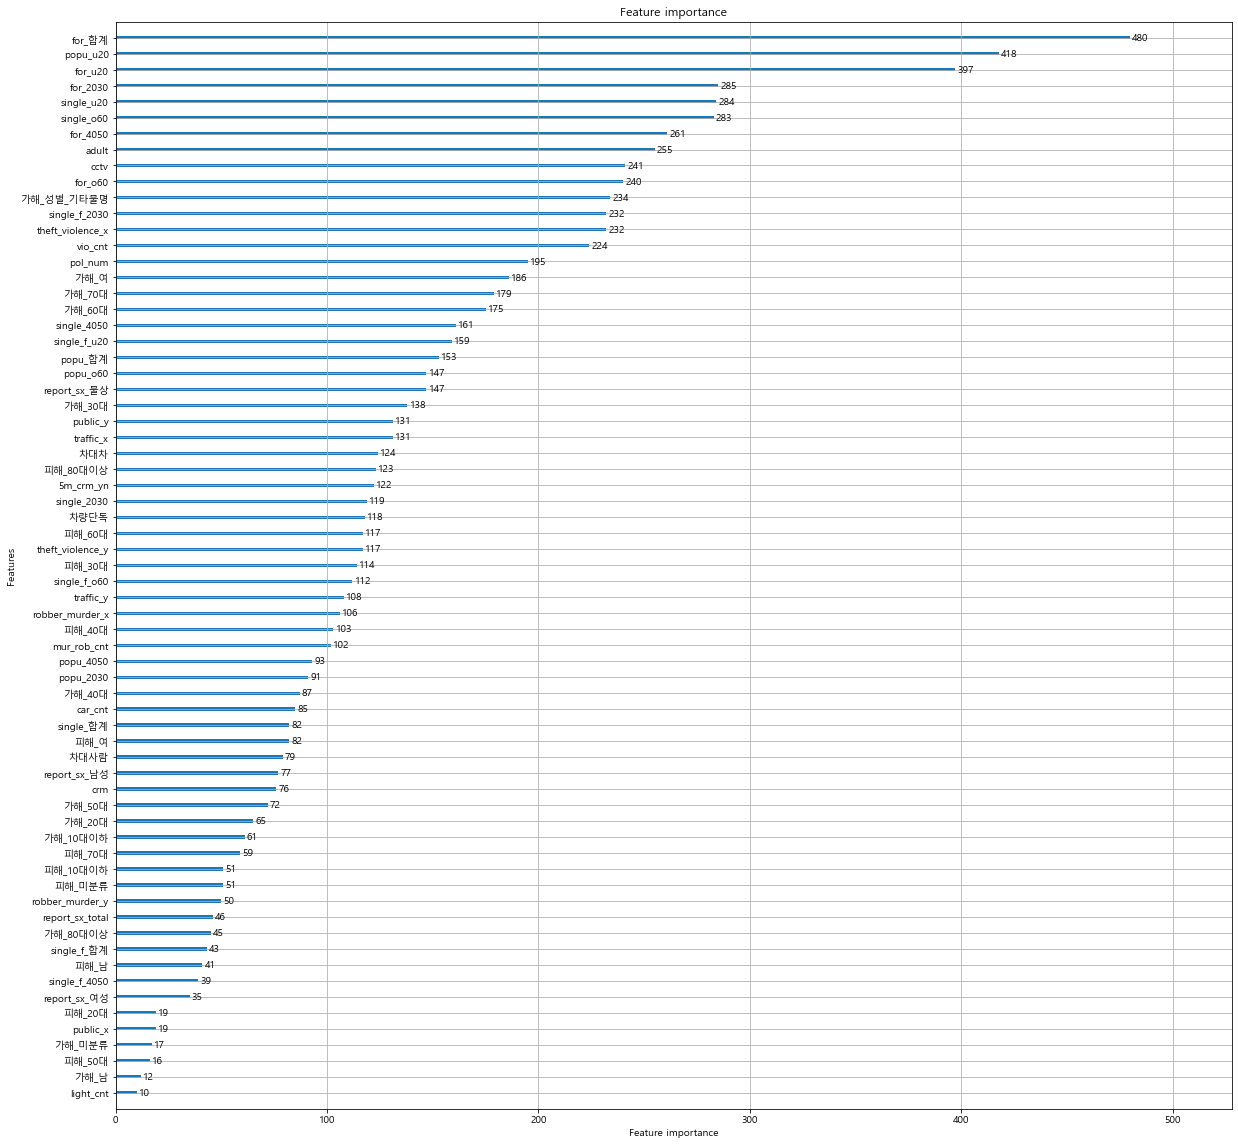

In [100]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_importance(lgb_model, ax=ax)
plt.show(30)